# Rolling Statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
com = pd.read_excel("./data/electricity.xlsx", sheet_name='com', header=None)
res = pd.read_excel("./data/electricity.xlsx", sheet_name='res', header=None)
ind = pd.read_excel("./data/electricity.xlsx", sheet_name='ind', header=None)
price = pd.read_excel("./data/electricity.xlsx", sheet_name='price', header=None)

usage = ind + res + com
first_year = usage.iloc[:, 0]
price = price * 1000 / 100
revenue = price * usage

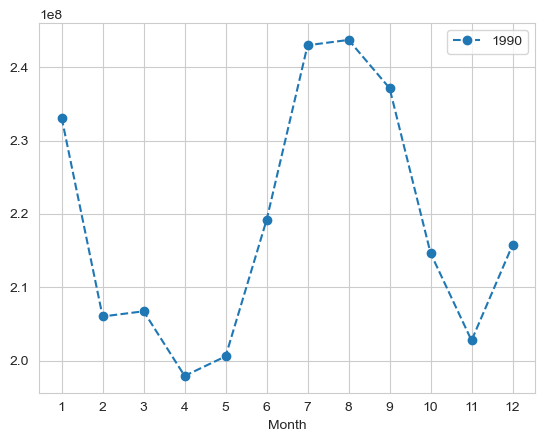

In [3]:
plt.figure()
plt.plot([i for i in range(1, 13)], first_year, marker='o', linestyle='dashed')
plt.xticks([i for i in range(1, 13)])
plt.xlabel("Month")
plt.legend(["1990"])
plt.show()

To calculate the difference between elements of a vector, we can use the [diff()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html#) function.

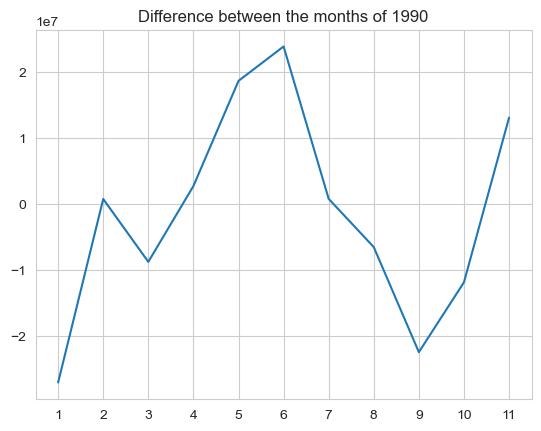

In [4]:
diff_1990 = first_year.diff()

plt.figure()
plt.plot(diff_1990)
plt.xticks([i for i in range(1, 12)])
plt.title("Difference between the months of 1990")
plt.show()

The largest increase in electricity usage is in June. The [diff()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html#) function also works on matrices column-wise, meaning it calculates the difference vector of each column.  The output is a matrix with one fewer row.

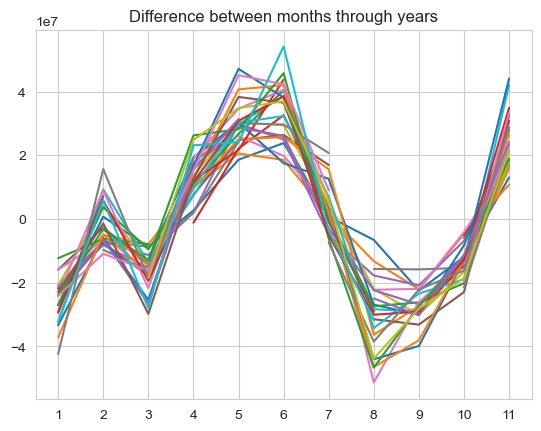

In [5]:
diff_by_month = usage.diff()

plt.figure()
plt.plot(diff_by_month)
plt.xticks([i for i in range(1, 12)])
plt.title("Difference between months through years")
plt.show()

It looks like in the plot that the highest increases are in early summer and December. We can obtain the index for the maximum of each column.

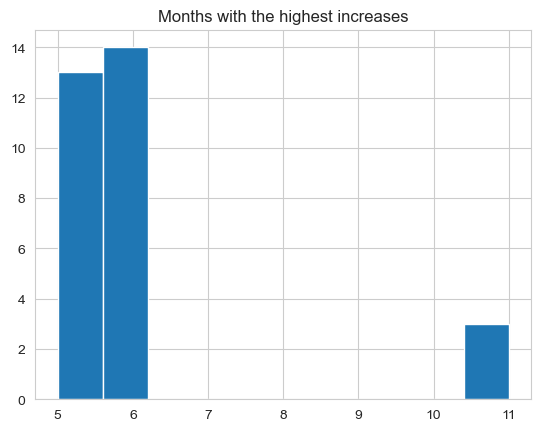

In [6]:
index_max = diff_by_month.idxmax()

plt.figure()
plt.hist(index_max)
plt.title("Months with the highest increases")
plt.show()

The [cumsum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html#pandas-dataframe-cumsum) function calculates the sum of an element with all the previous elements of a vector.

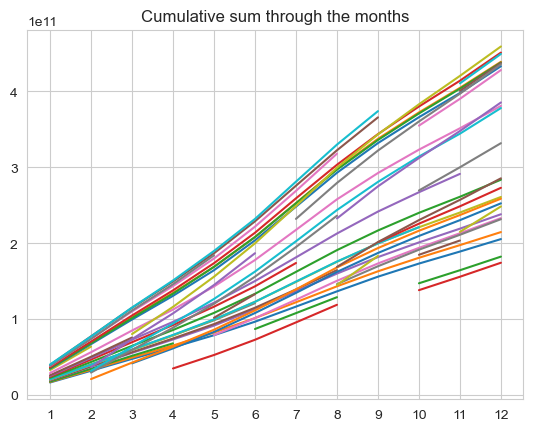

In [7]:
revenue_cumulative = revenue.cumsum()

plt.figure()
plt.plot(revenue_cumulative)
plt.xticks([i for i in range(12)], [i for i in range(1, 13)])
plt.title("Cumulative sum through the months")
plt.show()